# Area Processing

## Convolution

### blurring

In [ ]:
import numpy as np, cv2, time

# 회선 수행 함수 - 행렬 처리 방식(속도 면에서 유리)
def filter(image, mask):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1]//2, mask.shape[0]//2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            y1, y2 = i - ycenter, i + ycenter + 1               # 관심영역 높이 범위
            x1, x2 = j - xcenter, j + xcenter + 1               # 관심영역 너비 범위
            roi = image[y1:y2, x1:x2].astype("float32")         # 관심영역 형변환

            tmp = cv2.multiply(roi, mask)                       # 회선 적용 - OpenCV 곱셈
            dst[i, j] = cv2.sumElems(tmp)[0]                    # 출력화소 저장
    return dst                                                  # 자료형 변환하여 반환

# 회선 수행 함수 - 화소 직접 근접
def filter2(image, mask):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1]//2, mask.shape[0]//2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            sum = 0.0
            for u in range(mask.shape[0]):                    # 마스크 원소 순회
                for v in range(mask.shape[1]):
                    y, x = i + u - ycenter , j + v - xcenter
                    sum += image[y, x] * mask[u, v]           # 회선 수식
            dst[i, j] = sum
    return dst

image = cv2.imread("./data/filter_blur.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상파일 읽기 오류")

# 블러링 마스크 원소 지정
data = [1/9, 1/9, 1/9,
        1/9, 1/9, 1/9,
        1/9, 1/9, 1/9]
mask = np.array(data, np.float32).reshape(3, 3)
blur1 = filter(image, mask)                                    # 회선 수행 - 화소 직접 접근
blur2 = filter2(image, mask)                                   # 회선 수행

cv2.imshow("image", image)
cv2.imshow("blur1", blur1.astype("uint8"))
cv2.imshow("blur2", cv2.convertScaleAbs(blur1))
cv2.waitKey(0)


### sharpening

In [ ]:
import numpy as np, cv2, time

# 회선 수행 함수 - 행렬 처리 방식(속도 면에서 유리)
def filter(image, mask):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1]//2, mask.shape[0]//2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            y1, y2 = i - ycenter, i + ycenter + 1               # 관심영역 높이 범위
            x1, x2 = j - xcenter, j + xcenter + 1               # 관심영역 너비 범위
            roi = image[y1:y2, x1:x2].astype("float32")         # 관심영역 형변환

            tmp = cv2.multiply(roi, mask)                       # 회선 적용 - OpenCV 곱셈
            dst[i, j] = cv2.sumElems(tmp)[0]                    # 출력화소 저장
    return dst                                                  # 자료형 변환하여 반환

# 회선 수행 함수 - 화소 직접 근접
def filter2(image, mask):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
    xcenter, ycenter = mask.shape[1]//2, mask.shape[0]//2  # 마스크 중심 좌표

    for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
        for j in range(xcenter, cols - xcenter):
            sum = 0.0
            for u in range(mask.shape[0]):                    # 마스크 원소 순회
                for v in range(mask.shape[1]):
                    y, x = i + u - ycenter , j + v - xcenter
                    sum += image[y, x] * mask[u, v]           # 회선 수식
            dst[i, j] = sum
    return dst


image = cv2.imread("./data/filter_sharpen.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
if image is None: raise Exception("영상파일 읽기 오류")

# 샤프닝 마스크 원소 지정
data1 = [0, -1, 0,
        -1, 5, -1,
         0, -1, 0]
data2 = [[-1, -1, -1],
         [-1, 9, -1],
         [-1, -1, -1]]
mask1 = np.array(data1, np.float32).reshape(3, 3)
mask2 = np.array(data2, np.float32)

sharpen1 = filter(image, mask1)                     # 회선 수행
sharpen2 = filter(image, mask2)

cv2.imshow("image", image)
cv2.imshow("sharpen1", cv2.convertScaleAbs(sharpen1))  # 윈도우 표시 위한 형변환
cv2.imshow("sharpen2", cv2.convertScaleAbs(sharpen2))
cv2.waitKey(0)

## 선형 공간 필터링

### 이미지 흐리게 하기

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


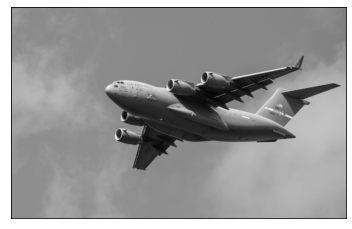

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('./data/plane.jpg', cv2.IMREAD_GRAYSCALE)

# 커널을 생성 - 전체 합이 1.0이 되도록 생성
kernel = np.ones((5,5)) / 25.0
# 커널을 확인
print(kernel)

# 커널을 적용
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image_kernel, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

### 이미지 선명하게 하기

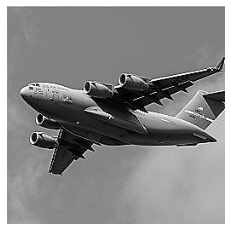

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드
image = cv2.imread("./data/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 커널 생성
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# 커널을 적용해서 이미지를 선명하게 하기
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()


### Roberts Mask

In [ ]:
def differential(image, data1, data2):
    mask1 = np.array(data1, np.float32).reshape(3, 3)
    mask2 = np.array(data2, np.float32).reshape(3, 3)

    dst1 = filter(image, mask1)
    dst2 = filter(image, mask2)
    dst = cv2.magnitude(dst1, dst2)  # 회선 결과인 두 행렬의 크기 계산
    dst1, dst2 = np.abs(dst1), np.abs(dst2)  # 회선 결과 행렬 양수 변경

    dst = np.clip(dst, 0, 255).astype("uint8")
    dst1 = np.clip(dst1, 0, 255).astype("uint8")
    dst2 = np.clip(dst2, 0, 255).astype("uint8")
    return dst, dst1, dst2

image = cv2.imread("./data/edge.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

data1 = [-1, 0, 0,
         0, 1, 0,
         0, 0, 0]
data2 = [0, 0, -1,
         0, 1, 0,
         0, 0, 0]
dst, dst1, dst2 = differential(image, data1, data2)  # 회선 수행 및 두 방향의 크기 계산

cv2.imshow("image", image)
cv2.imshow("roberts edge", dst)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.waitKey(0)

### Prewitt Mask

In [ ]:
def differential(image, data1, data2):
    mask1 = np.array(data1, np.float32).reshape(3, 3)
    mask2 = np.array(data2, np.float32).reshape(3, 3)

    dst1 = filter(image, mask1)                     # 사용자 정의 회선 함수
    dst2 = filter(image, mask2)
    dst = cv2.magnitude(dst1, dst2)                 # 회선 결과 두 행렬의 크기 계산

    dst = cv2.convertScaleAbs(dst)                      # 윈도우 표시 위해 OpenCV 함수로 형변환 및 saturation 수행
    dst1 = cv2.convertScaleAbs(dst1)
    dst2 = cv2.convertScaleAbs(dst2)
    return dst, dst1, dst2

image = cv2.imread("./data/edge.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

data1 = [-1, 0, 1,                         # 프리윗 수직 마스크
         -1, 0, 1,
         -1, 0, 1]
data2 = [-1,-1,-1,                         # 프리윗 수평 마스크
          0, 0, 0,
          1, 1, 1]
dst, dst1, dst2 = differential(image, data1, data2)

cv2.imshow("image", image)
cv2.imshow("prewitt edge", dst)
cv2.imshow("dst1 - vertical mask", dst1)
cv2.imshow("dst2 - horizontal mask", dst2)
cv2.waitKey(0)

### Sobel Mask

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

#2
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#4
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src',  src)
cv2.imshow('dstX',  dstX)
cv2.imshow('dstY',  dstY)
cv2.imshow('dstM',  dstM)
cv2.waitKey()
cv2.destroyAllWindows()


### 라플라시안 에지 검축

In [ ]:
import cv2
import numpy as np

#1
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('./data/9_F.jpg', cv2.IMREAD_GRAYSCALE)
blur= cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
cv2.imshow('src',  src)
cv2.imshow('blur', blur)

#2
lap  = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lap',  lap)
cv2.imshow('dst',  dst)

#3
lap2 = cv2.Laplacian(blur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2',  lap2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()
cv2.destroyAllWindows()

### Log & DoG

In [ ]:
import numpy as np, cv2

image = cv2.imread("./data/dog.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

gaus = cv2.GaussianBlur(image, (9,9), 0, 0)            # 가우시안 마스크 적용
dst1 = cv2.Laplacian(gaus, cv2.CV_16S, 9)             # 라플라시안 수행

gaus1 = cv2.GaussianBlur(image, (3, 3), 0)          # 가우사안 블러링
gaus2 = cv2.GaussianBlur(image, (9, 9), 0)
dst2 = gaus1 - gaus2          # DoG 수행

cv2.imshow("image", image)
cv2.imshow("dst1 - LoG", dst1.astype("uint8"))
cv2.imshow("dst2 - DoG", dst2)
cv2.waitKey(0)

### Kenny Edge

In [ ]:
import numpy as np, cv2

def nonmax_suppression(sobel, direct):
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2]
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]

            ## if 문으로 이웃 화소 가져오기
            # if direct[i, j] == 0: # 기울기 방향 0도
            # v1, v2 = sobel[i, j–1], sobel[i, j+1]
            # if direct[i, j] == 1: # 기울기 방향 45도
            # v1, v2 = sobel[i–1, j–1], sobel[i+1, j+1]
            # if direct[i, j] == 2: # 기울기 방향 90도
            # v1, v2 = sobel[i–1, j], sobel[i+1, j]
            # if direct[i, j] == 3 # 기울기 방향 135도
            # v1, v2 = sobel[i+1, j–1], sobel[i–1, j+1]

            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0
    return dst

def trace(max_sobel, i, j, low):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        canny[i, j] = 255

        trace(max_sobel, i - 1, j - 1, low)# 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low)
        trace(max_sobel, i + 1, j - 1, low)
        trace(max_sobel, i - 1, j    , low)
        trace(max_sobel, i + 1, j    , low)
        trace(max_sobel, i - 1, j + 1, low)
        trace(max_sobel, i    , j + 1, low)
        trace(max_sobel, i + 1, j + 1, low)

def hysteresis_th(max_sobel, low, high):                # 이력 임계값 수행
    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low)  # 추적 시작

image = cv2.imread("./data/canny.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류")

pos_ck = np.zeros(image.shape[:2], np.uint8)
canny = np.zeros(image.shape[:2], np.uint8)

# 사용자 정의 캐니 에지
gaus_img = cv2.GaussianBlur(image, (5, 5), 0.3)
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
sobel = np.fabs(Gx) + np.fabs(Gy)  # 두 행렬 절댓값 덧셈
# sobel = cv2.magnitude(Gx, Gy)                            # 두 행렬 벡터 크기

directs = cv2.phase(Gx, Gy) / (np.pi / 4)
directs = directs.astype(int) % 4
max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제
hysteresis_th(max_sobel, 100, 150)          # 이력 임계값

canny2 = cv2.Canny(image, 100, 150)                 # OpenCV 캐니 에지

cv2.imshow("image", image)
cv2.imshow("canny", canny)                 # 사용자 정의 캐니
cv2.imshow("OpenCV_Canny", canny2)           # OpenCV 캐니 에지
cv2.waitKey(0)

### 에지 검출

In [3]:
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('./data/9_F.jpg', cv2.IMREAD_GRAYSCALE)

#1
kx, ky = cv2.getDerivKernels(1, 0, ksize=3)
sobelX = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelX=', sobelX)
gx = cv2.filter2D(src, cv2.CV_32F, sobelX)
##gx = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#2
kx, ky = cv2.getDerivKernels(0, 1, ksize=3)
sobelY = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelY=', sobelY)
gy = cv2.filter2D(src, cv2.CV_32F, sobelY)
##gy = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#3
mag   = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge',  edge)
cv2.waitKey()
cv2.destroyAllWindows()

kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobelX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobelY= [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


## 비선형 공간 필터링

### 최솟값-최댓값 필터링

In [ ]:
import numpy as np, cv2


def minmax_filter(image, ksize, mode):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.uint8)
    center = ksize // 2  # 마스크 절반 크기

    for i in range(center, rows - center):  # 입력 영상 순회
        for j in range(center, cols - center):
            # 마스크 영역 행렬 처리 방식
            y1, y2 = i - center, i + center + 1  # 마스크 높이 범위
            x1, x2 = j - center, j + center + 1  # 마스크 너비 범위
            mask = image[y1:y2, x1:x2]  # 마스크 영역
            dst[i, j] = cv2.minMaxLoc(mask)[mode]
    return dst


image = cv2.imread("./data/min_max.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

minfilter_img = minmax_filter(image, 3, 0)  # 3x3 마스크 최솟값 필터링
maxfilter_img = minmax_filter(image, 3, 1)  # 3x3 마스크 최솟값 필터링

cv2.imshow("image", image)
cv2.imshow("minfilter_img", minfilter_img)
cv2.imshow("maxfilter_img", maxfilter_img)
cv2.waitKey(0)

### 평균값 필터링

In [ ]:
import numpy as np, cv2

def average_filter(image, ksize):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows, cols), np.uint8)
    center = ksize // 2                                 # 마스크 절반 크기

    for i in range(rows):           # 입력 영상 순회
        for j in range(cols):
            y1, y2 = i - center, i + center + 1        # 마스크 높이 범위
            x1, x2 = j - center, j + center + 1        # 마스크 너비 범위
            if y1 < 0 or y2 > rows or x1 < 0 or x2 > cols :
                dst[i, j] = image[i, j]
            else:
                mask = image[y1:y2, x1:x2]                 # 범위 지정
                dst[i, j] = cv2.mean(mask)[0]
    return dst

image = cv2.imread("./data/filter_avg.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

avg_img  = average_filter(image, 5)                    # 사용자 정의 평균값 필터 함수
blur_img = cv2.blur(image, (5, 5), borderType=cv2.BORDER_CONSTANT) # OpenCV의 블러링 함수
box_img  = cv2.boxFilter(image, ddepth=-1, ksize=(5, 5))   # OpenCV의 박스 필터 함수

cv2.imshow("image", image),
cv2.imshow("avg_img", avg_img)
cv2.imshow("blur_img", box_img)
cv2.imshow("box_img", box_img)
cv2.waitKey(0)

### 이미지 흐리게 하기

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("./data/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 흐리게 하기
image_blurry = cv2.blur(image, (5,5))

# 이미지를 출력
plt.imshow(image_blurry, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
# 이미지를 흐리게 
image_very_hundred = cv2.blur(image, (100,100))

# 이미지를 출력
plt.imshow(image_very_hundred, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

### 중간값 필터링, 가우시안 필터링

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1= cv2.medianBlur(src, ksize = 7)
dst2 = cv2.blur(src, ksize=(7, 7))
dst3 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
dst4 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=10.0)

cv2.imshow('dst1',  dst1)    
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)

cv2.waitKey()    
cv2.destroyAllWindows()


### 모폴리지 연산

In [ ]:
#침식
import numpy as np, cv2

image = cv2.imread("./data/morph.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

data = [0, 1, 0,                                               # 마스크 선언 및 초기화
        1, 1, 1,
        0, 1, 0]
mask = np.array(data, np.uint8).reshape(3, 3)
th_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]  # 영상 이진화
dst = cv2.erode(th_img, mask)

cv2.imshow("image", image)
cv2.imshow("binary image", th_img)
cv2.imshow("OpenCV erode", dst)
cv2.waitKey(0)

In [ ]:
#팽창
import numpy as np, cv2

image = cv2.imread("./data/morph.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

mask = np.array([[0, 1, 0],                         # 마스크 초기화
                 [1, 1, 1],
                 [0, 1, 0]]).astype("uint8")
th_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]  # 영상 이진화                           # 사용자 정의 팽창 함수
dst = cv2.dilate(th_img, mask)

cv2.imshow("original image", image)
cv2.imshow("OpenCV dilate", dst)
cv2.waitKey(0)

In [ ]:
#열림 과 닫힘 연산
import numpy as np, cv2

image = cv2.imread("./data/morph.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

mask = np.array([[0, 1, 0],                 # 마스크 초기화
                 [1, 1, 1],
                 [0, 1, 0]]).astype("uint8")
th_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]   # 영상 이진화

dst1 = cv2.morphologyEx(th_img, cv2.MORPH_OPEN, mask)   # OpenCV의 열림 함수
dst2 = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, mask, 1)  # OpenCV의 닫힘 함수

cv2.imshow("Original Image", image)
cv2.imshow("OpenCV opening", dst1)
cv2.imshow("OpenCV closing", dst2)
cv2.waitKey(0)

In [ ]:
#번포판 검출
import numpy as np, cv2

while True:
    no = int(input("차량 영상 번호( 0:종료 ) : "))  # 차량 번호 입력
    if no == 0: break;

    fname = "./data/test_car/{0:02d}.jpg".format(no)
    image = cv2.imread(fname, cv2.IMREAD_COLOR)
    if image is None:
        print(str(no) + "번 영상 파일이 없습니다.")
        continue

    mask = np.ones((5, 17), np.uint8)  # 닫힘 연산 마스크
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 명암도 영상 변환
    gray = cv2.blur(gray, (5, 5))  # 블러링
    gray = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 5)  # 소벨 에지 검출

    # 이진화 및 닫힘 연산 수행
    _, th_img = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
    morph = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, mask, iterations=3)

    cv2.imshow("image", image)
    cv2.imshow("binary image", th_img)
    cv2.imshow("opening", morph)
    cv2.waitKey()


### 알파벳 매칭

In [ ]:
import cv2
import numpy as np

src   = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A   = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
tmp_S   = cv2.imread('./data/S.bmp', cv2.IMREAD_GRAYSCALE)
tmp_b   = cv2.imread('./data/b.bmp', cv2.IMREAD_GRAYSCALE)
dst  = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 출력 표시 영상

#1
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED:', minVal, minLoc)

w, h = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0]+h, minLoc[1]+w), (255, 0, 0), 2)

#2
R2 = cv2.matchTemplate(src, tmp_S, cv2.TM_CCORR_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
w, h = tmp_S.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (0, 255, 0), 2)

#3
R3 = cv2.matchTemplate(src, tmp_b, cv2.TM_CCOEFF_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R3)
print('TM_CCOEFF_NORMED:', maxVal, maxLoc)
w, h = tmp_b.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (0, 0, 255), 2)

cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()